Exercise:

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work):
Plot bar charts showing impact of employee salaries on retention,
Plot bar charts showing corelation between department and employee retention,
Now build logistic regression model using variables that were narrowed down in step 1,
Measure the accuracy of the model

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [99]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [100]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [101]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From these stats we see that:
Employees with low satisfaction level are likely to leave the firm.
Employees with higher average monthly hours are likely too leave the firm.
Employees who have been given a promotion in the last five years are likey to stay at that firm.

Impact of Salary on Employee Retention:

Text(0, 0.5, 'Employees')

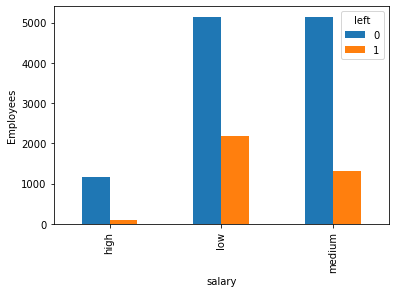

In [102]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.ylabel('Employees')

Above chart shows that employees with high salaries are more likey to stay.

Department Wise Employee Retention:

Text(0, 0.5, 'Employees')

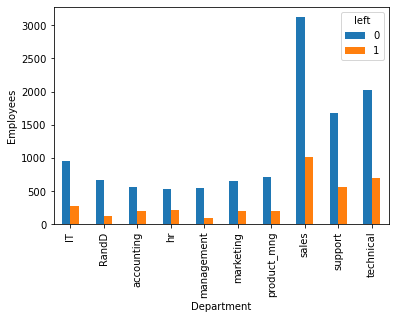

In [103]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
plt.ylabel('Employees')

From above chart we see that departments do play a small role in retention but its not that major, so we will ignore departments in our analysis.

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**,
**Average Monthly Hours**,
**Promotion Last 5 Years**,
**Salary**

In [104]:
sub_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
sub_df.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
5,0.41,153,0,low
6,0.10,247,0,low
7,0.92,259,0,low
8,0.89,224,0,low
9,0.42,142,0,low


In [105]:
salary_dummies = pd.get_dummies(df[['salary']])
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [106]:
df_with_dummies = pd.concat([sub_df, salary_dummies], axis='columns')
df_with_dummies.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
5,0.41,153,0,low,0,1,0
6,0.10,247,0,low,0,1,0
7,0.92,259,0,low,0,1,0
8,0.89,224,0,low,0,1,0
9,0.42,142,0,low,0,1,0


In [107]:
final_sub_df = df_with_dummies.drop(['salary'], axis='columns')
final_sub_df.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
5,0.41,153,0,0,1,0
6,0.10,247,0,0,1,0
7,0.92,259,0,0,1,0
8,0.89,224,0,0,1,0
9,0.42,142,0,0,1,0


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [109]:
X = final_sub_df
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [110]:
model = LogisticRegression()

In [111]:
model.fit(X_train, y_train)

c:\MKM_WORK\PYTHON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
11997,0.85,185,1,1,0,0
8232,0.66,244,0,0,0,1
2967,0.58,187,0,0,1,0
7492,0.15,96,0,1,0,0
9659,0.74,243,0,0,0,1
...,...,...,...,...,...,...
1863,0.10,244,0,0,0,1
515,0.88,219,0,0,1,0
4689,0.74,224,0,0,1,0
14149,0.15,144,1,1,0,0


In [114]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
model.score(X_test, y_test)

0.7813333333333333